In [1]:
from napari.utils import nbscreenshot

In [2]:
from skimage import io

nuclei_url = 'https://raw.githubusercontent.com/kevinyamauchi/napari-spot-detection-tutorial/main/data/nuclei_cropped.tif'
nuclei = io.imread(nuclei_url)

spots_url = 'https://raw.githubusercontent.com/kevinyamauchi/napari-spot-detection-tutorial/main/data/spots_cropped.tif'
spots = io.imread(spots_url)

In [3]:
import napari

# create the napari viewer
viewer = napari.Viewer();

# add the nuclei image to the viewer
viewer.add_image(nuclei);

In [4]:
# add the spots image to the viewer
viewer.add_image(spots)

<Image layer 'spots' at 0x7fdc303b0280>

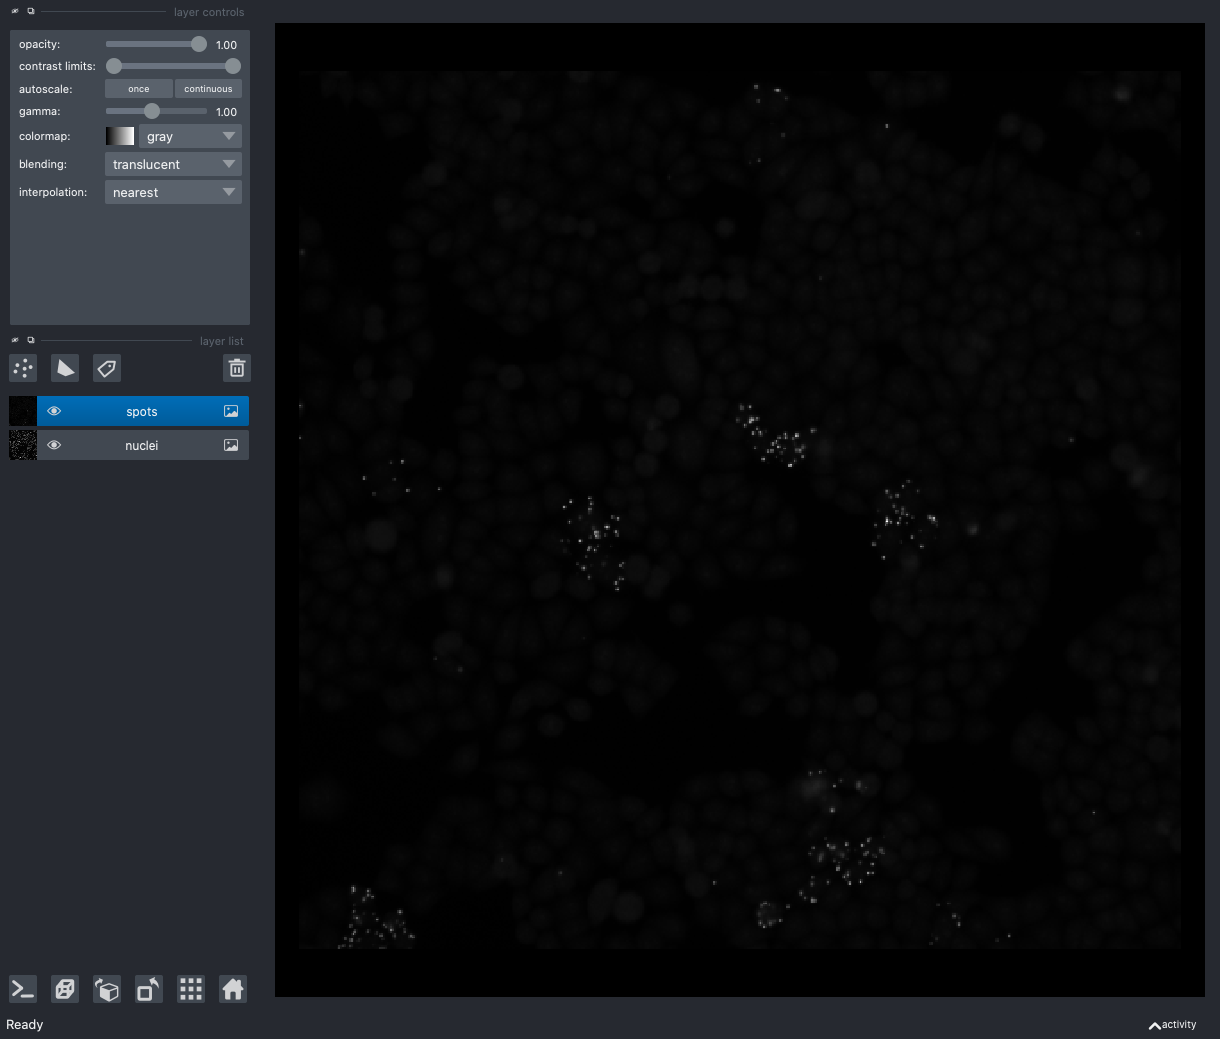

In [5]:
nbscreenshot(viewer)

In [6]:
import numpy as np
from scipy import ndimage as ndi

def gaussian_high_pass(image: np.ndarray, sigma: float = 2):
    """Apply a gaussian high pass filter to an image.

    Parameters
    ----------
    image : np.ndarray
        The image to be filtered.
    sigma : float
        The sigma (width) of the gaussian filter to be applied.
        The default value is 2.
    
    Returns
    -------
    high_passed_im : np.ndarray
        The image with the high pass filter applied
    """
    low_pass = ndi.gaussian_filter(image, sigma)
    high_passed_im = image - low_pass
    
    return high_passed_im

In [7]:
# Use the gaussian_high_pass function to filter the spots image
filtered_spots = gaussian_high_pass(spots, 2)

# add the filtered image to the viewer
# hint: set the opacity < 1 in order to see the layers underneath
viewer.add_image(filtered_spots, opacity=0.6)

<Image layer 'filtered_spots' at 0x7fdc10b70e80>

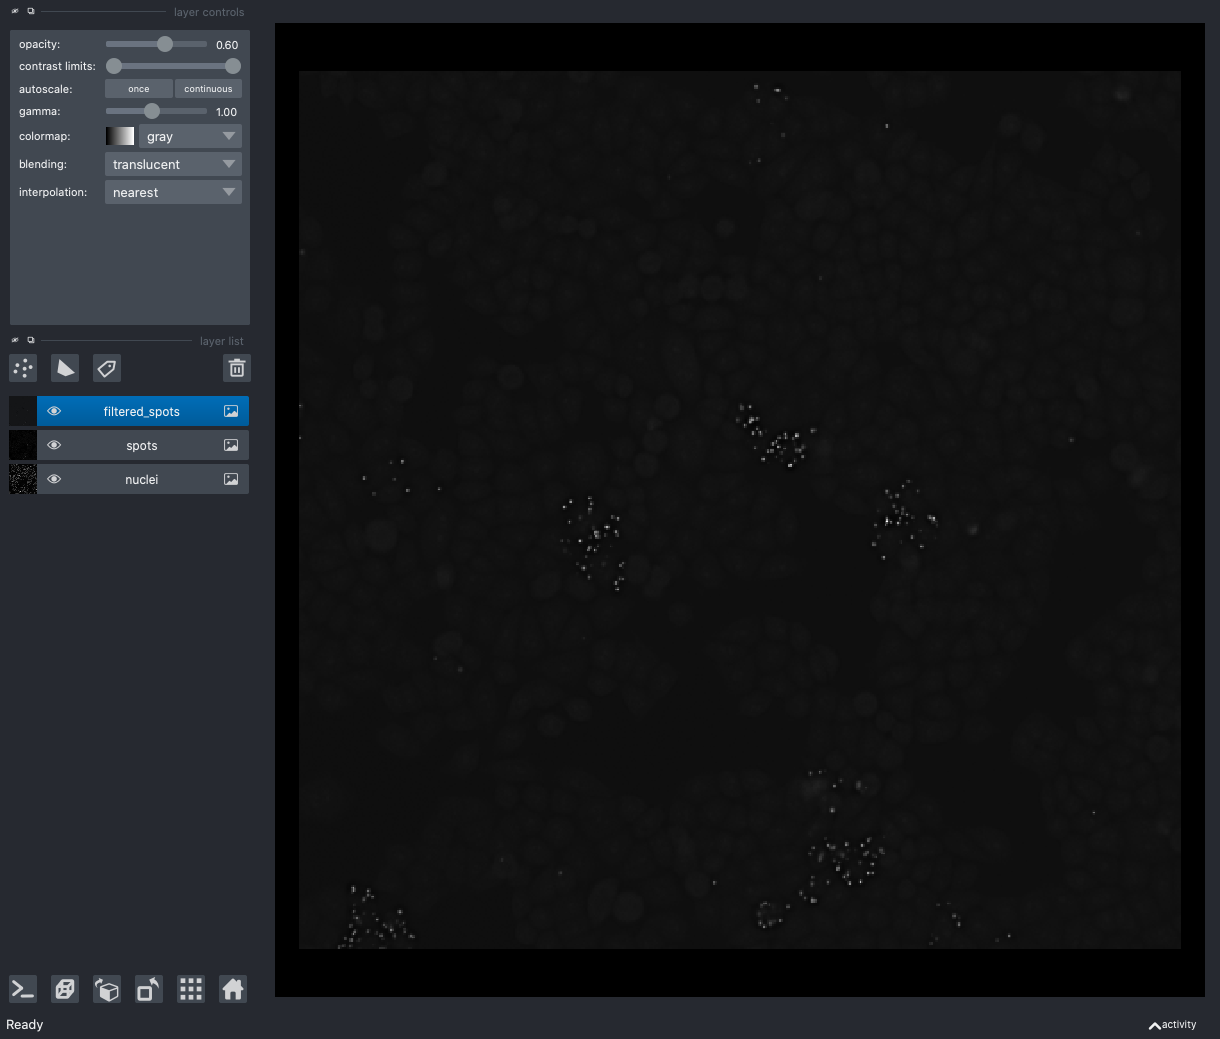

In [8]:
nbscreenshot(viewer)

In [9]:
import numpy as np
from skimage.feature import blob_log

def detect_spots(
    image: np.ndarray,
    high_pass_sigma: float = 2,
    spot_threshold: float = 0.01,
    blob_sigma: float = 2
):
    """Apply a gaussian high pass filter to an image.

    Parameters
    ----------
    image : np.ndarray
        The image in which to detect the spots.
    high_pass_sigma : float
        The sigma (width) of the gaussian filter to be applied.
        The default value is 2.
    spot_threshold : float
        The threshold to be passed to the blob detector.
        The default value is 0.01.
    blob_sigma: float
        The expected sigma (width) of the spots. This parameter
        is passed to the "max_sigma" parameter of the blob
        detector.
    
    Returns
    -------
    points_coords : np.ndarray
        An NxD array with the coordinate for each detected spot.
        N is the number of spots and D is the number of dimensions.
    sizes : np.ndarray
        An array of size N, where N is the number of detected spots
        with the diameter of each spot.
    
    """
    # filter the image
    filtered_spots = gaussian_high_pass(image, high_pass_sigma)

    # detect the spots on the filtered image
    blobs_log = blob_log(
        filtered_spots,
        max_sigma=blob_sigma,
        num_sigma=1,
        threshold=spot_threshold
    )
    
    # convert the output of the blob detector to the 
    # desired points_coords and sizes arrays
    # (see the docstring for details)
    points_coords = blobs_log[:, 0:2]
    sizes = 2 * np.sqrt(2) * blobs_log[:, 2]

    return points_coords, sizes

In [10]:
    # detect the spots
spot_coords, spot_sizes = detect_spots(
    spots,
    high_pass_sigma=2,
    spot_threshold=0.01,
    blob_sigma=2
)

# add the detected spots to the viewer as a Points layer
viewer.add_points(spot_coords, size=spot_sizes, symbol='ring')

<Points layer 'spot_coords' at 0x7fdc10d1b580>

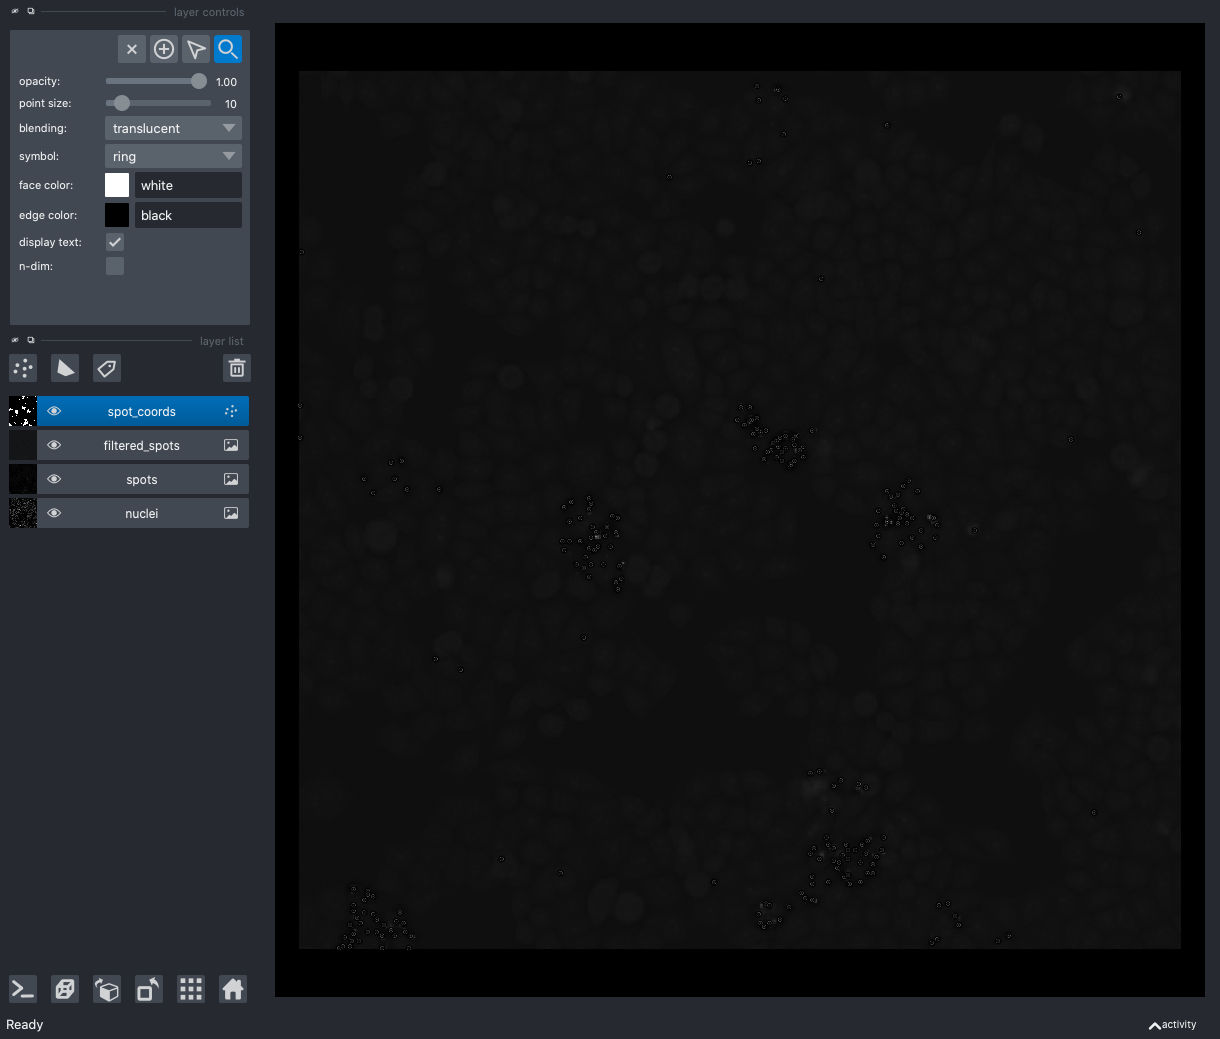

In [11]:
nbscreenshot(viewer)